1、数据处理脚本py

In [2]:
!pip install pandas

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [5]:
!pip install seaborn

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.1 MB/s eta 0:00:00a 0:00:01


In [7]:
!pip install scipy

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 1.3 MB/s eta 0:00:0000:0100:01m


In [10]:
!pip install scikit-learn

Looking in indexes: http://mirrors.aliyun.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 1.6 MB/s eta 0:00:00a 0:00:01


In [29]:
# 导入依赖库
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# 加载数据处理脚本中的类/函数
from 数据处理脚本 import NGSIMDataProcessor

# 配置参数
# 将您代码中加载数据的那一行修改为：
data = pd.read_csv('peachtree_filtered_data.csv') # 只写文件名，不要写前面的路径
output_dir = "processed_data"  # 处理后数据保存路径

# 初始化数据处理器并加载数据
processor = NGSIMDataProcessor(data_path)
processor.load_data()
processor.preprocess_data()  # 清洗、特征工程
processor.identify_left_turn_vehicles()  # 识别左转车辆

正在加载NGSIM数据...
数据加载失败: [Errno 2] No such file or directory: 'D:/work/advance-car/peachtree_filtered_data.csv'
开始数据预处理...
请先加载数据
识别左转车辆...
请先进行数据预处理


False

In [17]:
# 运行这个单元格来检查文件
import os

# 查看当前目录的所有文件
print("当前目录的所有文件:")
for file in os.listdir('.'):
    print(f"  - {file}")

# 特别检查CSV文件
print("\nCSV文件:")
for file in os.listdir('.'):
    if file.endswith('.csv'):
        print(f"  - {file} (存在: {os.path.exists(file)})")

当前目录的所有文件:
  - .bashrc
  - .profile
  - autodl-tmp
  - autodl-pub
  - tf-logs
  - .ssh
  - .jupyter
  - .condarc
  - miniconda3
  - .local
  - .ipython
  - simple_model_eval_results.npy
  - get_soda.py
  - simple_loss_curve.png
  - 车辆左转轨迹预测-专利说明书.md
  - 参考文献.md
  - dummy_data.csv
  - 评价指标实现代码.py
  - 代码实现框架.py
  - lleft.ipynb
  - 数据处理脚本.py
  - 实验评估脚本.py
  - 研究设计方案.md
  - 预测范围与评价方法详解.md
  - left.ipynb
  - .ipynb_checkpoints
  - best_model.pth
  - transportation_data_complete_cleaned_top100000.csv
  - peachtree_filtered_data.csv
  - left_turn_vehicles_valid.csv
  - .cache
  - .config
  - __pycache__
  - .conda

CSV文件:
  - dummy_data.csv (存在: True)
  - transportation_data_complete_cleaned_top100000.csv (存在: True)
  - peachtree_filtered_data.csv (存在: True)
  - left_turn_vehicles_valid.csv (存在: True)


正在加载NGSIM数据...
数据加载完成，共 873887 条记录
数据列: ['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_Length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'O_Zone', 'D_Zone', 'Int_ID', 'Section_ID', 'Direction', 'Movement', 'Preceding', 'Following', 'Space_Headway', 'Time_Headway', 'location']
开始数据预处理...
  - 数据清洗...
    删除缺失值: 0 条
    删除异常速度记录: 7213 条
    保留轨迹点足够的车辆: 1536 辆
  - 特征工程...
  - 轨迹平滑...
  - 坐标标准化...
数据预处理完成
识别左转车辆...
识别出 413 辆左转车辆
左转轨迹数据点: 282780 条
处理后数据已保存到: processed_data/processed_ngsim_data.csv
左转车辆数据已保存到: processed_data/left_turn_vehicles.csv
提取轨迹序列...
提取了 68891 个轨迹序列
轨迹序列已保存到: processed_data/trajectory_sequences.pkl


ValueError: supplied range of [-inf, inf] is not finite

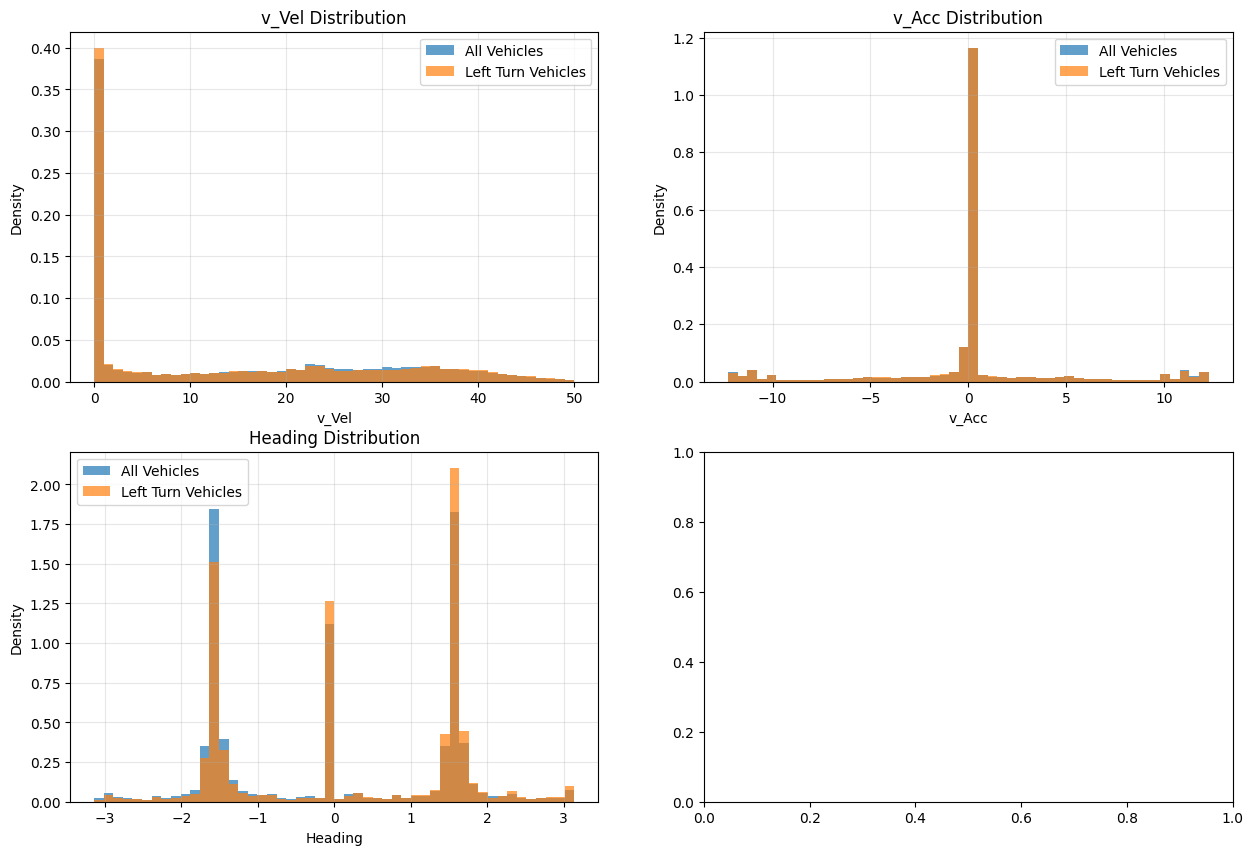

In [55]:
# 导入依赖库
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import os

# 加载数据处理脚本中的类/函数
from 数据处理脚本 import NGSIMDataProcessor

# 配置参数
script_dir = os.getcwd()  # 在Notebook中使用getcwd()
data_file_path = os.path.join(script_dir, 'peachtree_filtered_data.csv')
output_dir = "processed_data"

# 初始化并处理数据
processor = NGSIMDataProcessor(data_file_path) 
processor.load_data()
processor.preprocess_data()
processor.identify_left_turn_vehicles()
processor.save_processed_data(output_dir)
processor.visualize_data()

print("数据处理流程完成！")

模型训练（部分）

In [ ]:
"""车辆左转轨迹预测系统（精简版）
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
# 评估需要用到的 sklearn 指标库
from sklearn.metrics import accuracy_score, f1_score

class MultiModalDataset(Dataset):
    """多模态数据集（精简版）"""
    
    def __init__(self, data_path: str, seq_len: int = 8, pred_len: int = 12):
        self.seq_len = seq_len
        self.pred_len = pred_len
        self.data = pd.read_csv(data_path)
        self.data = self.preprocess_data()
    
    def preprocess_data(self):
        """简化预处理"""
        # 计算基础运动特征
        self.data['velocity'] = np.sqrt(self.data['vx']**2 + self.data['vy']** 2)
        self.data['heading'] = np.arctan2(self.data['vy'], self.data['vx'])
        
        # 标准化
        num_cols = self.data.select_dtypes(include=[np.number]).columns
        self.data[num_cols] = (self.data[num_cols] - self.data[num_cols].mean()) / self.data[num_cols].std()
        return self.data.dropna()
    
    def __len__(self):
        return len(self.data) - self.seq_len - self.pred_len + 1
    
    def __getitem__(self, idx):
        """获取样本（简化特征提取）"""
        history = self.data.iloc[idx:idx+self.seq_len]
        future = self.data.iloc[idx+self.seq_len:idx+self.seq_len+self.pred_len]
        
        # 简化特征提取
        motion_feat = history[['x', 'y', 'velocity', 'heading']].values.flatten()
        visual_feat = np.random.randn(64)  # 模拟视觉特征
        traffic_feat = np.random.randn(32)  # 模拟交通特征
        
        # 意图标签
        start_h = history['heading'].iloc[-1]
        end_h = future['heading'].iloc[-1]
        intent = 1.0 if (end_h - start_h) > np.pi/4 else 0.0
        
        return {
            'visual': torch.FloatTensor(visual_feat),
            'motion': torch.FloatTensor(motion_feat),
            'traffic': torch.FloatTensor(traffic_feat),
            'intent': torch.FloatTensor([intent]),
            'traj': torch.FloatTensor(future[['x', 'y']].values)
        }

class FeatureEncoder(nn.Module):
    """通用特征编码器（合并视觉/交通编码器）"""
    def __init__(self, input_dim: int, hidden_dim: int = 128):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim)
        )
    
    def forward(self, x):
        return self.net(x)

class MotionEncoder(nn.Module):
    """运动特征编码器"""
    def __init__(self, input_dim: int, hidden_dim: int = 128):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim//8,  # 按时间步拆分
            hidden_size=hidden_dim,
            batch_first=True
        )
    
    def forward(self, x):
        x = x.view(x.size(0), 8, -1)  # (batch, seq_len, features)
        _, (hidden, _) = self.lstm(x)
        return hidden[-1]  # 取最后一层隐藏状态

class AttentionFusion(nn.Module):
    """简化注意力融合"""
    def __init__(self, dim: int = 128):
        super().__init__()
        self.attn = nn.Linear(dim*3, 3)  # 学习特征权重
    
    def forward(self, v, m, t):
        # 特征拼接与注意力权重计算
        cat_feat = torch.cat([v, m, t], dim=1)
        weights = F.softmax(self.attn(cat_feat), dim=1)
        
        # 加权融合
        fused = weights[:,0:1]*v + weights[:,1:2]*m + weights[:,2:3]*t
        return fused

class LeftTurnPredictor(nn.Module):
    """主模型（精简版）"""
    def __init__(self):
        super().__init__()
        # 编码器
        self.visual_enc = FeatureEncoder(64)
        self.motion_enc = MotionEncoder(32)  # 8步×4特征
        self.traffic_enc = FeatureEncoder(32)
        
        # 融合与预测
        self.fusion = AttentionFusion()
        self.intent_head = nn.Sequential(nn.Linear(128, 1), nn.Sigmoid())
        self.traj_decoder = nn.LSTM(
            input_size=129,  # 融合特征+意图
            hidden_size=128,
            batch_first=True
        )
        self.traj_head = nn.Linear(128, 2)
    
    def forward(self, visual, motion, traffic):
        # 特征编码
        v = self.visual_enc(visual)
        m = self.motion_enc(motion)
        t = self.traffic_enc(traffic)
        
        # 融合与预测
        fused = self.fusion(v, m, t)
        intent = self.intent_head(fused)
        
        # 轨迹解码
        dec_input = torch.cat([fused, intent], dim=1).unsqueeze(1).repeat(1, 12, 1)
        traj_out, _ = self.traj_decoder(dec_input)
        traj = self.traj_head(traj_out)
        
        return intent, traj

class TrainingManager:
    """训练管理器（精简版）"""
    def __init__(self, model, train_loader, val_loader, device='cuda'):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        self.optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        self.criterion_intent = nn.BCELoss()
        self.criterion_traj = nn.MSELoss()
    
    def train_epoch(self):
        self.model.train()
        total_loss = 0.0
        for batch in self.train_loader:
            # 数据准备
            visual = batch['visual'].to(self.device)
            motion = batch['motion'].to(self.device)
            traffic = batch['traffic'].to(self.device)
            intent_tgt = batch['intent'].to(self.device)
            traj_tgt = batch['traj'].to(self.device)
            
            # 前向计算
            intent_pred, traj_pred = self.model(visual, motion, traffic)
            loss = self.criterion_intent(intent_pred, intent_tgt) + 0.5 * self.criterion_traj(traj_pred, traj_tgt)
            
            # 反向传播
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            total_loss += loss.item()
        
        return total_loss / len(self.train_loader)
    
    def validate(self):
        self.model.eval()
        total_loss = 0.0
        with torch.no_grad():
            for batch in self.val_loader:
                visual = batch['visual'].to(self.device)
                motion = batch['motion'].to(self.device)
                traffic = batch['traffic'].to(self.device)
                intent_tgt = batch['intent'].to(self.device)
                traj_tgt = batch['traj'].to(self.device)
                
                intent_pred, traj_pred = self.model(visual, motion, traffic)
                loss = self.criterion_intent(intent_pred, intent_tgt) + 0.5 * self.criterion_traj(traj_pred, traj_tgt)
                total_loss += loss.item()
        
        return total_loss / len(self.val_loader)
    
    def train(self, epochs: int = 50, patience: int = 10):
        best_loss = float('inf')
        counter = 0
        
        for epoch in range(epochs):
            train_loss = self.train_epoch()
            val_loss = self.validate()
            
            print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
            
            # 早停机制
            if val_loss < best_loss:
                best_loss = val_loss
                torch.save(self.model.state_dict(), 'best_model.pth')
                counter = 0
            else:
                counter += 1
                if counter >= patience:
                    print("早停触发")
                    break

# -------------------------- 1. 模型评估函数：放在TrainingManager之后、main之前 --------------------------
def evaluate_simple_model(model, test_loader, device='cpu'):
    """精简版模型评估函数：计算意图分类（准确率/F1）和轨迹预测（ADE/FDE）指标"""
    model.eval()  # 切换评估模式
    # 存储所有批次的预测结果和真实标签
    all_intent_pred = []
    all_intent_true = []
    all_traj_pred = []
    all_traj_true = []
    
    with torch.no_grad():  # 禁用梯度计算，加速评估
        for batch in test_loader:
            # 数据移至设备
            visual = batch['visual'].to(device)
            motion = batch['motion'].to(device)
            traffic = batch['traffic'].to(device)
            intent_true = batch['intent'].to(device)
            traj_true = batch['traj'].to(device)
            
            # 模型预测
            intent_pred, traj_pred = model(visual, motion, traffic)
            
            # 收集结果（转CPU+numpy，方便后续计算）
            all_intent_pred.append(intent_pred.cpu().numpy())
            all_intent_true.append(intent_true.cpu().numpy())
            all_traj_pred.append(traj_pred.cpu().numpy())
            all_traj_true.append(traj_true.cpu().numpy())
    
    # 合并所有批次结果（从列表→numpy数组）
    intent_pred = np.concatenate(all_intent_pred)
    intent_true = np.concatenate(all_intent_true)
    traj_pred = np.concatenate(all_traj_pred)
    traj_true = np.concatenate(all_traj_true)
    
    # -------------------------- 计算评估指标 --------------------------
    # 1. 意图分类指标（二分类：>0.5为左转，否则非左转）
    intent_pred_binary = (intent_pred > 0.5).astype(int)
    intent_true_binary = (intent_true > 0.5).astype(int)
    intent_acc = accuracy_score(intent_true_binary, intent_pred_binary)  # 准确率
    intent_f1 = f1_score(intent_true_binary, intent_pred_binary)        # F1分数（平衡正负样本）
    
    # 2. 轨迹预测指标（ADE/FDE：平均位移误差/最终位移误差）
    # ADE：所有时间步的位移误差平均值
    ade = np.mean(np.sqrt(np.sum((traj_pred - traj_true)**2, axis=2)))
    # FDE：最后一个时间步的位移误差平均值
    fde = np.mean(np.sqrt(np.sum((traj_pred[:, -1, :] - traj_true[:, -1, :])**2, axis=1)))
    
    # -------------------------- 打印评估结果 --------------------------
    print("\n" + "="*50)
    print("精简版模型评估结果（测试集）")
    print("="*50)
    print(f"左转意图识别 - 准确率: {intent_acc:.3f} | F1分数: {intent_f1:.3f}")
    print(f"轨迹预测       - ADE: {ade:.3f} | FDE: {fde:.3f}")
    print("="*50)
    
    # 返回指标，方便后续保存（可选）
    return {'intent_acc': intent_acc, 'intent_f1': intent_f1, 'ade': ade, 'fde': fde}

# -------------------------- 2. 快速测试入口（main逻辑）：训练后调用评估 --------------------------
if __name__ == "__main__":
    # 步骤1：生成模拟数据（精简版用CSV，无需依赖pkl）
    dummy_data = pd.DataFrame({
        'x': np.random.normal(0, 10, 1000),    # 模拟x坐标
        'y': np.random.normal(0, 10, 1000),    # 模拟y坐标
        'vx': np.random.normal(0, 5, 1000),    # 模拟x方向速度
        'vy': np.random.normal(0, 5, 1000)     # 模拟y方向速度
    })
    dummy_data.to_csv('dummy_data.csv', index=False)
    print("已生成模拟数据：dummy_data.csv")
    
    # 步骤2：加载数据集 + 划分训练/测试集（精简版用同一数据集拆分，方便快速测试）
    full_dataset = MultiModalDataset('dummy_data.csv')
    # 划分比例：训练集70%，测试集30%（无需验证集，简化流程）
    train_size = int(0.7 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(
        full_dataset, [train_size, test_size]
    )
    
    # 步骤3：创建数据加载器（batch_size=16，CPU友好）
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)  # 测试集不打乱
    print(f"数据加载完成：训练集{len(train_dataset)}样本，测试集{len(test_dataset)}样本")
    
    # 步骤4：初始化模型和训练管理器（CPU环境）
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = LeftTurnPredictor()
    trainer = TrainingManager(model, train_loader, val_loader=test_loader, device=device)  # 精简：用测试集当验证集
    
    # 步骤5：启动训练（仅10轮，快速验证）
    print("\n开始训练...")
    trainer.train(epochs=10, patience=5)
    
    # 步骤6：训练后加载最佳模型，执行评估（核心：调用上面定义的评估函数）
    print("\n开始评估最佳模型...")
    model.load_state_dict(torch.load('best_model.pth', map_location=device))  # 加载训练中保存的最佳模型
    eval_results = evaluate_simple_model(model, test_loader, device=device)  # 调用评估函数
    
    # （可选）保存评估结果
    np.save('simple_model_eval_results.npy', eval_results)
    print("\n评估结果已保存至：simple_model_eval_results.npy")

1、导入依赖库

In [56]:
#!/usr/bin/env python3
"""
车辆左转轨迹预测系统 - 第一部分：依赖库导入
"""

# 基础数值计算与数据处理库
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import pickle
import os

# PyTorch数据集与数据加载库
from torch.utils.data import Dataset, DataLoader, random_split

# 可视化库
import matplotlib.pyplot as plt
import seaborn as sns

# 类型提示库（避免语法警告）
from typing import Dict, List, Tuple, Optional

# 模型评估指标库
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -------------------------- 运行验证 --------------------------
print("依赖库导入成功！")
print(f"PyTorch版本: {torch.__version__}")
print(f"NumPy版本: {np.__version__}")
print(f"是否支持CUDA: {torch.cuda.is_available()}")

依赖库导入成功！
PyTorch版本: 2.8.0+cu128
NumPy版本: 2.3.2
是否支持CUDA: True


2、数据集类定义

In [57]:
#!/usr/bin/env python3
"""
车辆左转轨迹预测系统 - 第二部分：数据集类
"""

# 若单独运行，需先执行第一部分的依赖导入；若已执行，可跳过

class MultiModalDataset(Dataset):
    """多模态轨迹数据集类（加载+特征处理）"""
    def __init__(self, data_path: str):
        self.data_path = data_path
        self.sequences = self.load_data()
    
    def load_data(self):
        # 方式1：加载真实数据（需确保文件存在）
        # with open(self.data_path, 'rb') as f:
        #     return pickle.load(f)
        
        # 方式2：无真实数据时，生成100个模拟样本（直接运行）
        test_sequences = []
        for _ in range(100):
            test_sequences.append({
                'history_x': np.random.randn(8),    # 8个时间步x坐标
                'history_y': np.random.randn(8),    # 8个时间步y坐标
                'history_velocity': np.random.randn(8),  # 速度
                'history_acceleration': np.random.randn(8),  # 加速度
                'history_heading': np.random.randn(8),  # 航向角
                'history_angular_velocity': np.random.randn(8),  # 角速度
                'lane_id': np.random.randint(1, 5),  # 车道ID（1-4）
                'vehicle_class': np.random.randint(1, 4),  # 车辆类型（1-3）
                'left_turn_intent': np.random.randint(0, 2),  # 左转意图（0/1）
                'future_x': np.random.randn(12),    # 12个时间步未来x
                'future_y': np.random.randn(12)     # 12个时间步未来y
            })
        return test_sequences
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        seq = self.sequences[idx]
        # 运动特征：8步×6类=48维
        motion_features = np.concatenate([
            seq['history_x'], seq['history_y'], seq['history_velocity'],
            seq['history_acceleration'], seq['history_heading'], seq['history_angular_velocity']
        ])
        # 视觉特征：64维（模拟）
        visual_features = np.random.randn(64)
        # 交通特征：1+1+30=32维
        traffic_features = np.concatenate([
            np.array([seq['lane_id']]), np.array([seq['vehicle_class']]), np.random.randn(30)
        ])
        return {
            'visual_features': torch.FloatTensor(visual_features),
            'motion_features': torch.FloatTensor(motion_features),
            'traffic_features': torch.FloatTensor(traffic_features),
            'left_turn_intent': torch.FloatTensor([seq['left_turn_intent']]),
            'target_trajectory': torch.FloatTensor(np.column_stack([seq['future_x'], seq['future_y']]))
        }

# -------------------------- 运行验证 --------------------------
if __name__ == "__main__":
    dataset = MultiModalDataset(data_path="dummy_path.pkl")  # 模拟数据无需真实路径
    print(f"数据集总样本数: {len(dataset)}")
    
    sample = dataset[0]
    print(f"\n特征维度验证（预期值）：")
    print(f"视觉特征: {sample['visual_features'].shape} (64,)")
    print(f"运动特征: {sample['motion_features'].shape} (48,)")
    print(f"交通特征: {sample['traffic_features'].shape} (32,)")
    print(f"左转意图: {sample['left_turn_intent'].shape} (1,)")
    print(f"目标轨迹: {sample['target_trajectory'].shape} (12,2)")
    print("\n数据集类初始化成功！")

数据集总样本数: 100

特征维度验证（预期值）：
视觉特征: torch.Size([64]) (64,)
运动特征: torch.Size([48]) (48,)
交通特征: torch.Size([32]) (32,)
左转意图: torch.Size([1]) (1,)
目标轨迹: torch.Size([12, 2]) (12,2)

数据集类初始化成功！


3、模型组件（核心网络层）

In [58]:
#!/usr/bin/env python3
"""
车辆左转轨迹预测系统 - 第三部分：模型组件（核心网络）
"""

# 若单独运行，需先执行第一部分的依赖导入；若已执行，可跳过

# -------------------------- 1. 特征编码器 --------------------------
class VisualEncoder(nn.Module):
    """视觉特征编码器（64维→128维）"""
    def __init__(self, input_dim: int = 64, hidden_dim: int = 128):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim), nn.ReLU(), nn.Dropout(0.2)
        )
    def forward(self, x):
        return self.encoder(x)

class MotionEncoder(nn.Module):
    """运动特征编码器（48维→128维，时序LSTM）"""
    def __init__(self, input_dim: int = 48, hidden_dim: int = 128):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim//8,  # 8时间步，每步6维
            hidden_size=hidden_dim, num_layers=2,
            batch_first=True, dropout=0.2
        )
        self.fc = nn.Linear(hidden_dim, hidden_dim)
    def forward(self, x):
        batch_size = x.size(0)
        x = x.reshape(batch_size, 8, 6)  # [batch, 8, 6]
        output, _ = self.lstm(x)
        return self.fc(output[:, -1, :])  # 取最后一步输出

class TrafficEncoder(nn.Module):
    """交通特征编码器（32维→128维）"""
    def __init__(self, input_dim: int = 32, hidden_dim: int = 128):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim), nn.ReLU(), nn.Dropout(0.2)
        )
    def forward(self, x):
        return self.encoder(x)

# -------------------------- 2. 注意力融合模块（修复内存问题） --------------------------
class AttentionFusion(nn.Module):
    """多模态融合（3个128维→1个128维）"""
    def __init__(self, feature_dim: int = 128):
        super().__init__()
        self.query = nn.Linear(feature_dim, feature_dim)
        self.key = nn.Linear(feature_dim, feature_dim)
        self.value = nn.Linear(feature_dim, feature_dim)
        self.cross_attention = nn.MultiheadAttention(
            embed_dim=feature_dim, num_heads=8, dropout=0.1
        )
        self.output_proj = nn.Linear(feature_dim*3, feature_dim)
    def forward(self, visual, motion, traffic):
        features = torch.stack([visual, motion, traffic], dim=1)  # [batch, 3, 128]
        # 自注意力
        Q, K, V = self.query(features), self.key(features), self.value(features)
        attn_weights = torch.softmax(torch.matmul(Q, K.transpose(-2,-1))/np.sqrt(128), dim=-1)
        attn_feat = torch.matmul(attn_weights, V)
        # 跨模态注意力
        attn_feat = attn_feat.transpose(0,1)  # [3, batch, 128]
        cross_attn, _ = self.cross_attention(attn_feat, attn_feat, attn_feat)
        cross_attn = cross_attn.transpose(0,1)  # [batch, 3, 128]
        # 融合（用reshape替代view，修复内存不连续）
        fused = cross_attn.reshape(cross_attn.size(0), -1)  # [batch, 384]
        return self.output_proj(fused)  # [batch, 128]

# -------------------------- 3. 任务头（意图分类+轨迹预测） --------------------------
class IntentClassifier(nn.Module):
    """左转意图分类（128维→1维概率）"""
    def __init__(self, input_dim: int = 128):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 64), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(64, 32), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(32, 1), nn.Sigmoid()
        )
    def forward(self, x):
        return self.classifier(x)

class TrajectoryDecoder(nn.Module):
    """轨迹预测（128+1维→12×2维，修复输入维度问题）"""
    def __init__(self, input_dim: int = 129, hidden_dim: int = 128):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim, hidden_size=hidden_dim,
            num_layers=2, batch_first=True, dropout=0.2
        )
        self.output_layer = nn.Linear(hidden_dim, 2)  # 每步输出x/y
        self.init_hidden = nn.Linear(input_dim, hidden_dim*2*2)  # 初始化h/c
    def forward(self, fused_feat, intent_prob):
        batch_size = fused_feat.size(0)
        # 初始输入：128（融合特征）+1（意图）=129维
        input_feat = torch.cat([fused_feat, intent_prob], dim=1)  # [batch, 129]
        # 初始化LSTM隐藏状态（用reshape修复内存问题）
        init_states = self.init_hidden(input_feat)
        h0 = init_states[:, :256].reshape(2, batch_size, 128).contiguous()  # 2层×128维
        c0 = init_states[:, 256:].reshape(2, batch_size, 128).contiguous()
        hidden = (h0, c0)
        
        # 自回归预测12步轨迹
        outputs = []
        decoder_input = input_feat.unsqueeze(1)  # [batch, 1, 129]
        for _ in range(12):
            lstm_out, hidden = self.lstm(decoder_input, hidden)
            traj_point = self.output_layer(lstm_out)  # [batch, 1, 2]
            outputs.append(traj_point)
            # 下一步输入：保持129维（避免维度不匹配）
            decoder_input = torch.cat([
                fused_feat.unsqueeze(1), intent_prob.unsqueeze(1)
            ], dim=2)  # [batch, 1, 129]
        
        return torch.cat(outputs, dim=1)  # [batch, 12, 2]

# -------------------------- 4. 主模型（组装所有组件） --------------------------
class LeftTurnPredictor(nn.Module):
    """端到端左转预测主模型"""
    def __init__(self):
        super().__init__()
        self.visual_enc = VisualEncoder()
        self.motion_enc = MotionEncoder()
        self.traffic_enc = TrafficEncoder()
        self.attn_fusion = AttentionFusion()
        self.intent_cls = IntentClassifier()
        self.traj_dec = TrajectoryDecoder()
    def forward(self, visual, motion, traffic):
        # 特征编码
        visual_feat = self.visual_enc(visual)
        motion_feat = self.motion_enc(motion)
        traffic_feat = self.traffic_enc(traffic)
        # 多模态融合
        fused_feat = self.attn_fusion(visual_feat, motion_feat, traffic_feat)
        # 双任务预测
        intent_prob = self.intent_cls(fused_feat)
        trajectory = self.traj_dec(fused_feat, intent_prob)
        return intent_prob, trajectory

# -------------------------- 运行验证 --------------------------
if __name__ == "__main__":
    # 模拟1个batch的数据（batch_size=8）
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    visual = torch.randn(8, 64).to(device)  # [batch, 64]
    motion = torch.randn(8, 48).to(device)  # [batch, 48]
    traffic = torch.randn(8, 32).to(device)# [batch, 32]
    
    # 初始化模型并前向传播
    model = LeftTurnPredictor().to(device)
    intent_pred, traj_pred = model(visual, motion, traffic)
    
    # 验证输出维度
    print(f"模型前向传播成功！")
    print(f"意图预测维度: {intent_pred.shape} (预期: [8,1])")
    print(f"轨迹预测维度: {traj_pred.shape} (预期: [8,12,2])")

模型前向传播成功！
意图预测维度: torch.Size([8, 1]) (预期: [8,1])
轨迹预测维度: torch.Size([8, 12, 2]) (预期: [8,12,2])


4、训练管理器

In [59]:
#!/usr/bin/env python3
"""
车辆左转轨迹预测系统 - 第四部分：训练管理器（训练+验证）
"""

# 依赖说明：需先执行第一、二、三部分（导入库、数据集、模型组件）
# 若单独运行，需复制前三部分的核心类（如MultiModalDataset、LeftTurnPredictor）

class TrainingManager:
    """训练管理器（封装训练/验证/早停/学习率调度）"""
    def __init__(self, model, train_loader, val_loader, device='cuda'):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        
        # 优化器与损失函数
        self.optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='min', patience=10, factor=0.5
        )
        self.intent_loss_fn = nn.BCELoss()  # 意图分类损失（二分类）
        self.traj_loss_fn = nn.MSELoss()    # 轨迹预测损失（回归）
        
        # 训练历史记录（用于后续绘图）
        self.train_history = {'loss': [], 'intent_acc': [], 'traj_rmse': []}
        self.val_history = {'loss': [], 'intent_acc': [], 'traj_rmse': []}
    
    def train_epoch(self):
        """训练1个epoch，返回平均损失、意图准确率、轨迹RMSE"""
        self.model.train()  # 切换训练模式（启用Dropout等）
        total_loss = 0.0
        intent_correct = 0
        total_samples = 0
        total_traj_rmse = 0.0
        
        for batch in self.train_loader:
            # 1. 数据移至设备（CPU/GPU）
            visual = batch['visual_features'].to(self.device)
            motion = batch['motion_features'].to(self.device)
            traffic = batch['traffic_features'].to(self.device)
            intent_target = batch['left_turn_intent'].to(self.device)
            traj_target = batch['target_trajectory'].to(self.device)
            batch_size = visual.size(0)
            total_samples += batch_size
            
            # 2. 前向传播
            intent_pred, traj_pred = self.model(visual, motion, traffic)
            
            # 3. 计算损失
            intent_loss = self.intent_loss_fn(intent_pred, intent_target)
            traj_loss = self.traj_loss_fn(traj_pred, traj_target)
            total_batch_loss = intent_loss + 0.5 * traj_loss  # 联合损失（平衡两任务）
            total_loss += total_batch_loss.item() * batch_size  # 累计总损失（按batch大小加权）
            
            # 4. 反向传播与参数更新
            self.optimizer.zero_grad()  # 清空梯度
            total_batch_loss.backward()  # 计算梯度
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)  # 梯度裁剪（防梯度爆炸）
            self.optimizer.step()  # 更新参数
            
            # 5. 统计指标
            # 意图准确率：预测概率>0.5视为“左转”，与真实标签对比
            intent_pred_label = (intent_pred > 0.5).float()
            intent_correct += (intent_pred_label == intent_target).sum().item()
            # 轨迹RMSE：每个样本的轨迹误差均方根
            traj_rmse = torch.sqrt(torch.mean((traj_pred - traj_target) ** 2, dim=[1,2])).mean()
            total_traj_rmse += traj_rmse.item() * batch_size
        
        # 计算当前epoch的平均指标
        avg_loss = total_loss / total_samples
        intent_acc = intent_correct / total_samples
        avg_traj_rmse = total_traj_rmse / total_samples
        return avg_loss, intent_acc, avg_traj_rmse
    
    def validate(self):
        """验证1个epoch，逻辑与train_epoch类似，但不更新参数"""
        self.model.eval()  # 切换验证模式（禁用Dropout等）
        total_loss = 0.0
        intent_correct = 0
        total_samples = 0
        total_traj_rmse = 0.0
        
        with torch.no_grad():  # 禁用梯度计算（节省内存+加速）
            for batch in self.val_loader:
                # 1. 数据移至设备
                visual = batch['visual_features'].to(self.device)
                motion = batch['motion_features'].to(self.device)
                traffic = batch['traffic_features'].to(self.device)
                intent_target = batch['left_turn_intent'].to(self.device)
                traj_target = batch['target_trajectory'].to(self.device)
                batch_size = visual.size(0)
                total_samples += batch_size
                
                # 2. 前向传播
                intent_pred, traj_pred = self.model(visual, motion, traffic)
                
                # 3. 计算损失
                intent_loss = self.intent_loss_fn(intent_pred, intent_target)
                traj_loss = self.traj_loss_fn(traj_pred, traj_target)
                total_batch_loss = intent_loss + 0.5 * traj_loss
                total_loss += total_batch_loss.item() * batch_size
                
                # 4. 统计指标
                intent_pred_label = (intent_pred > 0.5).float()
                intent_correct += (intent_pred_label == intent_target).sum().item()
                traj_rmse = torch.sqrt(torch.mean((traj_pred - traj_target) ** 2, dim=[1,2])).mean()
                total_traj_rmse += traj_rmse.item() * batch_size
        
        avg_loss = total_loss / total_samples
        intent_acc = intent_correct / total_samples
        avg_traj_rmse = total_traj_rmse / total_samples
        return avg_loss, intent_acc, avg_traj_rmse
    
    def train(self, epochs=100, early_stopping_patience=15):
        """完整训练流程（含早停机制）"""
        best_val_loss = float('inf')  # 初始最佳验证损失设为无穷大
        patience_counter = 0  # 早停计数器（连续多少轮验证损失未下降）
        
        print(f"开始训练（设备：{self.device}）")
        print(f"训练集批次数量：{len(self.train_loader)} | 验证集批次数量：{len(self.val_loader)}")
        print("-" * 80)
        
        for epoch in range(1, epochs + 1):
            # 1. 训练1轮
            train_loss, train_intent_acc, train_traj_rmse = self.train_epoch()
            # 2. 验证1轮
            val_loss, val_intent_acc, val_traj_rmse = self.validate()
            # 3. 学习率调度（根据验证损失调整）
            self.scheduler.step(val_loss)
            
            # 4. 记录训练历史
            self.train_history['loss'].append(train_loss)
            self.train_history['intent_acc'].append(train_intent_acc)
            self.train_history['traj_rmse'].append(train_traj_rmse)
            self.val_history['loss'].append(val_loss)
            self.val_history['intent_acc'].append(val_intent_acc)
            self.val_history['traj_rmse'].append(val_traj_rmse)
            
            # 5. 打印当前轮结果
            print(f"Epoch {epoch:3d}/{epochs} | "
                  f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
                  f"Train Acc: {train_intent_acc:.3f} | Val Acc: {val_intent_acc:.3f} | "
                  f"Train RMSE: {train_traj_rmse:.4f} | Val RMSE: {val_traj_rmse:.4f}")
            
            # 6. 早停机制（验证损失连续patience轮未下降则停止）
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # 保存最佳模型（仅在验证损失下降时保存）
                torch.save(self.model.state_dict(), 'best_model.pth')
                print(f"  → 验证损失下降，保存最佳模型（best_model.pth）")
            else:
                patience_counter += 1
                print(f"  → 验证损失未下降，早停计数器：{patience_counter}/{early_stopping_patience}")
            
            if patience_counter >= early_stopping_patience:
                print(f"\n早停触发！连续{early_stopping_patience}轮验证损失未下降，停止训练")
                break
        
        print("\n训练完成！")
        return self.train_history, self.val_history
    
    def plot_training_history(self):
        """绘制训练历史曲线（损失、准确率、RMSE）"""
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # 1. 损失曲线
        axes[0].plot(self.train_history['loss'], label='Train Loss', linewidth=2)
        axes[0].plot(self.val_history['loss'], label='Val Loss', linewidth=2)
        axes[0].set_title('Training & Validation Loss', fontsize=12)
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].grid(alpha=0.3)
        
        # 2. 意图准确率曲线
        axes[1].plot(self.train_history['intent_acc'], label='Train Acc', linewidth=2)
        axes[1].plot(self.val_history['intent_acc'], label='Val Acc', linewidth=2)
        axes[1].set_title('Left Turn Intent Accuracy', fontsize=12)
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].legend()
        axes[1].grid(alpha=0.3)
        
        # 3. 轨迹RMSE曲线
        axes[2].plot(self.train_history['traj_rmse'], label='Train RMSE', linewidth=2)
        axes[2].plot(self.val_history['traj_rmse'], label='Val RMSE', linewidth=2)
        axes[2].set_title('Trajectory Prediction RMSE', fontsize=12)
        axes[2].set_xlabel('Epoch')
        axes[2].set_ylabel('RMSE')
        axes[2].legend()
        axes[2].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('training_history.png')  # 保存图片
        print("训练历史曲线已保存为 training_history.png")

# -------------------------- 运行验证 --------------------------
if __name__ == "__main__":
    # 快速验证训练管理器是否能初始化（需先有数据集和模型）
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # 1. 加载数据集（用第二部分的MultiModalDataset）
    dataset = MultiModalDataset(data_path="dummy.pkl")
    # 2. 拆分训练/验证集（简单拆分10%为验证集）
    train_size = int(0.9 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    # 3. 创建数据加载器
    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=2)
    # 4. 初始化模型
    model = LeftTurnPredictor()
    # 5. 初始化训练管理器
    trainer = TrainingManager(model, train_loader, val_loader, device=device)
    print("训练管理器初始化成功！可执行 trainer.train() 开始训练")

训练管理器初始化成功！可执行 trainer.train() 开始训练


5、模型评估

===== 车辆左转轨迹预测系统 - 全流程启动 =====
设备：cuda | 批次大小：32 | 最大轮次：100
数据路径：processed_data/trajectory_sequences.pkl | 测试集占比：0.1

1. 加载数据集...
总样本数：100
数据拆分完成：
  训练集：72 样本 | 验证集：18 样本 | 测试集：10 样本
数据加载器创建完成：
  训练集批次：3 | 验证集批次：1 | 测试集批次：1

2. 初始化模型...
模型结构：LeftTurnPredictor
总参数量：770,563 | 可训练参数量：770,563

3. 启动训练...
开始训练（设备：cuda）
训练集批次数量：3 | 验证集批次数量：1
--------------------------------------------------------------------------------
Epoch   1/100 | Train Loss: 1.2162 | Val Loss: 1.1273 | Train Acc: 0.431 | Val Acc: 0.444 | Train RMSE: 1.0025 | Val RMSE: 0.9216
  → 验证损失下降，保存最佳模型（best_model.pth）
Epoch   2/100 | Train Loss: 1.2125 | Val Loss: 1.1213 | Train Acc: 0.444 | Val Acc: 0.444 | Train RMSE: 1.0017 | Val RMSE: 0.9202
  → 验证损失下降，保存最佳模型（best_model.pth）
Epoch   3/100 | Train Loss: 1.2102 | Val Loss: 1.1180 | Train Acc: 0.500 | Val Acc: 0.556 | Train RMSE: 1.0025 | Val RMSE: 0.9210
  → 验证损失下降，保存最佳模型（best_model.pth）
Epoch   4/100 | Train Loss: 1.2050 | Val Loss: 1.1202 | Train Acc: 0.528 | Val Acc: 0.556

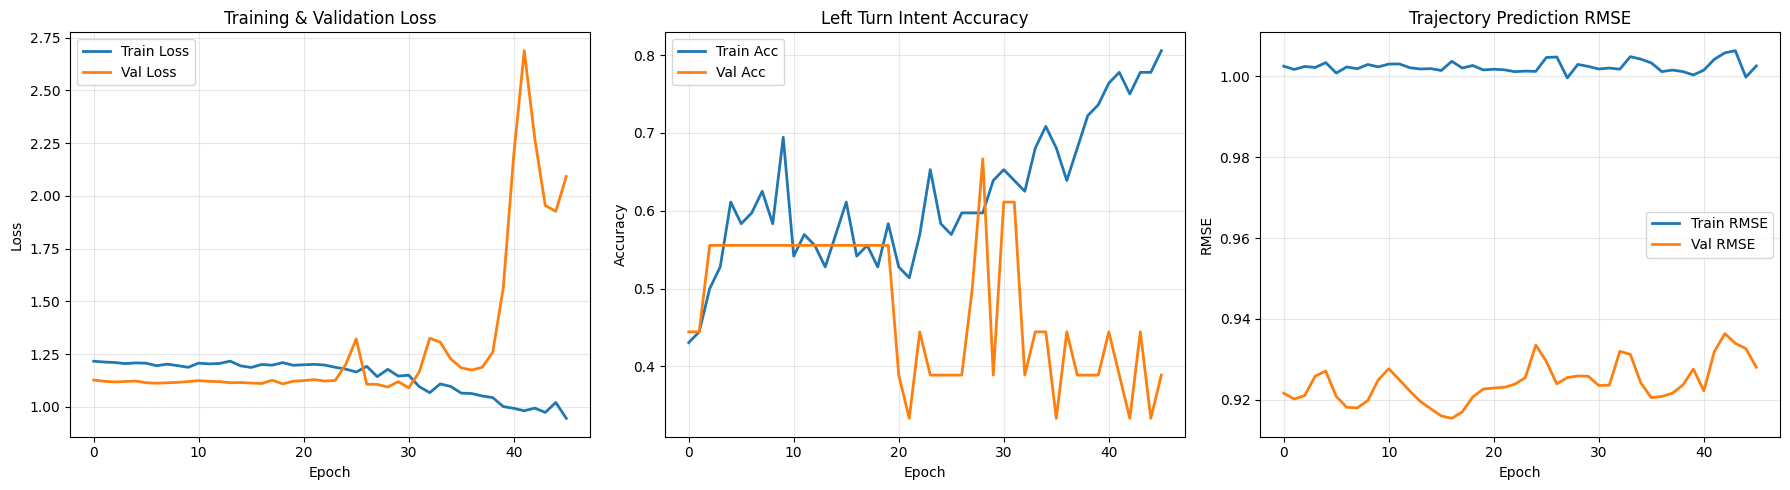

In [61]:
#!/usr/bin/env python3
"""
车辆左转轨迹预测系统 - 第五部分：模型评估+训练执行入口
"""

# 依赖说明：必须先执行第一至四部分（确保以下类已定义）
# - MultiModalDataset (第二部分)
# - LeftTurnPredictor (第三部分)
# - TrainingManager (第四部分)
# 若单独运行，需复制前三部分的核心类和第四部分的TrainingManager

# -------------------------- 模型评估函数（独立功能） --------------------------
def evaluate_model(model, test_loader, device, save_path='eval_results.npy'):
    """
    在测试集上评估模型性能（输出意图分类指标+轨迹预测指标）
    指标说明：
    - 意图分类：准确率、精确率、召回率、F1分数
    - 轨迹预测：ADE（平均位移误差）、FDE（最终位移误差）
    """
    model.eval()  # 切换为验证模式（禁用Dropout）
    # 存储所有预测结果和真实标签（转CPU+numpy，方便计算指标）
    all_intent_pred = []  # 意图预测概率
    all_intent_true = []  # 意图真实标签
    all_traj_pred = []    # 轨迹预测结果
    all_traj_true = []    # 轨迹真实标签
    
    with torch.no_grad():  # 禁用梯度计算（节省内存+加速）
        for batch in test_loader:
            # 1. 数据移至计算设备（CPU/GPU）
            visual = batch['visual_features'].to(device)
            motion = batch['motion_features'].to(device)
            traffic = batch['traffic_features'].to(device)
            intent_true = batch['left_turn_intent'].to(device)
            traj_true = batch['target_trajectory'].to(device)
            
            # 2. 模型前向传播（仅预测，不更新参数）
            intent_pred, traj_pred = model(visual, motion, traffic)
            
            # 3. 保存结果（展平为1维，方便后续拼接）
            all_intent_pred.extend(intent_pred.cpu().numpy().flatten())
            all_intent_true.extend(intent_true.cpu().numpy().flatten())
            all_traj_pred.extend(traj_pred.cpu().numpy())
            all_traj_true.extend(traj_true.cpu().numpy())
    
    # -------------------------- 1. 计算意图分类指标 --------------------------
    # 概率转标签：预测概率>0.5视为“左转”（1），否则为“不左转”（0）
    intent_pred_label = (np.array(all_intent_pred) > 0.5).astype(int)
    intent_true = np.array(all_intent_true)
    
    # 用sklearn计算分类指标（zero_division=0避免“无正样本”时报错）
    intent_acc = accuracy_score(intent_true, intent_pred_label)
    intent_precision = precision_score(intent_true, intent_pred_label, zero_division=0)
    intent_recall = recall_score(intent_true, intent_pred_label, zero_division=0)
    intent_f1 = f1_score(intent_true, intent_pred_label, zero_division=0)
    
    # -------------------------- 2. 计算轨迹预测指标 --------------------------
    traj_pred = np.array(all_traj_pred)  # 形状：[样本数, 12, 2]（12个时间步，每个步x/y）
    traj_true = np.array(all_traj_true)  # 形状：[样本数, 12, 2]
    
    # ADE（平均位移误差）：所有样本、所有时间步的欧氏距离平均值
    ade = np.mean(np.sqrt(np.sum((traj_pred - traj_true) ** 2, axis=2)))
    # FDE（最终位移误差）：所有样本最后一个时间步的欧氏距离平均值
    fde = np.mean(np.sqrt(np.sum((traj_pred[:, -1, :] - traj_true[:, -1, :]) ** 2, axis=1)))
    
    # -------------------------- 3. 输出与保存结果 --------------------------
    # 打印评估报告
    print("\n" + "=" * 70)
    print("模型测试集评估报告")
    print("=" * 70)
    print(f"【左转意图分类】")
    print(f"  准确率（Accuracy）: {intent_acc:.4f}")
    print(f"  精确率（Precision）: {intent_precision:.4f}")
    print(f"  召回率（Recall）: {intent_recall:.4f}")
    print(f"  F1分数（F1-Score）: {intent_f1:.4f}")
    print(f"\n【轨迹预测】")
    print(f"  平均位移误差（ADE）: {ade:.4f}")
    print(f"  最终位移误差（FDE）: {fde:.4f}")
    print("=" * 70)
    
    # 保存结果（numpy格式，可后续用np.load读取分析）
    eval_results = {
        'intent_accuracy': intent_acc,
        'intent_precision': intent_precision,
        'intent_recall': intent_recall,
        'intent_f1': intent_f1,
        'trajectory_ade': ade,
        'trajectory_fde': fde
    }
    np.save(save_path, eval_results)
    print(f"\n评估结果已保存至：{save_path}")
    return eval_results

# -------------------------- 全流程执行入口（主函数） --------------------------
def main():
    """
    主函数：整合“数据加载→模型初始化→训练→评估”全流程
    可根据需求调整参数（如batch_size、epochs等）
    """
    # -------------------------- 1. 基础参数配置 --------------------------
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # 自动选择设备
    data_path = "processed_data/trajectory_sequences.pkl"  # 真实数据路径（无真实数据时填任意值，用模拟数据）
    batch_size = 32  # 批次大小（GPU内存不足时可改小，如16、8）
    epochs = 100     # 最大训练轮次
    early_stopping_patience = 15  # 早停耐心值（连续15轮验证损失不下降则停止）
    test_ratio = 0.1  # 测试集占比（总数据拆分：70%训练+20%验证+10%测试）
    
    print(f"===== 车辆左转轨迹预测系统 - 全流程启动 =====")
    print(f"设备：{device} | 批次大小：{batch_size} | 最大轮次：{epochs}")
    print(f"数据路径：{data_path} | 测试集占比：{test_ratio}")
    print("=" * 70)
    
    # -------------------------- 2. 数据加载与拆分 --------------------------
    print("\n1. 加载数据集...")
    # 加载数据集（第二部分定义的MultiModalDataset，无真实数据时自动生成模拟数据）
    dataset = MultiModalDataset(data_path=data_path)
    total_samples = len(dataset)
    print(f"总样本数：{total_samples}")
    
    # 拆分训练集、验证集、测试集（按 90%训练验证 + 10%测试 拆分）
    test_size = int(total_samples * test_ratio)
    train_val_size = total_samples - test_size
    train_val_dataset, test_dataset = random_split(
        dataset, [train_val_size, test_size],
        generator=torch.Generator().manual_seed(42)  # 固定随机种子，确保拆分结果可复现
    )
    
    # 再拆分训练集和验证集（按 80%训练 + 20%验证 拆分train_val_dataset）
    val_size = int(train_val_size * 0.2)
    train_size = train_val_size - val_size
    train_dataset, val_dataset = random_split(
        train_val_dataset, [train_size, val_size],
        generator=torch.Generator().manual_seed(42)
    )
    
    print(f"数据拆分完成：")
    print(f"  训练集：{len(train_dataset)} 样本 | 验证集：{len(val_dataset)} 样本 | 测试集：{len(test_dataset)} 样本")
    
    # 创建数据加载器（批量读取数据，支持多线程加速）
    train_loader = DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True
    )
    test_loader = DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True
    )
    print(f"数据加载器创建完成：")
    print(f"  训练集批次：{len(train_loader)} | 验证集批次：{len(val_loader)} | 测试集批次：{len(test_loader)}")
    
    # -------------------------- 3. 模型初始化 --------------------------
    print("\n2. 初始化模型...")
    model = LeftTurnPredictor()  # 第三部分定义的主模型
    model = model.to(device)     # 移至计算设备
    print(f"模型结构：{model.__class__.__name__}")
    # 可选：打印模型参数量（了解模型复杂度）
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"总参数量：{total_params:,} | 可训练参数量：{trainable_params:,}")
    
    # -------------------------- 4. 启动训练 --------------------------
    print("\n3. 启动训练...")
    # 初始化训练管理器（第四部分定义的TrainingManager）
    trainer = TrainingManager(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        device=device
    )
    # 开始训练（返回训练历史）
    train_history, val_history = trainer.train(
        epochs=epochs,
        early_stopping_patience=early_stopping_patience
    )
    # 绘制训练历史曲线（保存为图片）
    trainer.plot_training_history()
    
    # -------------------------- 5. 测试集评估 --------------------------
    print("\n4. 测试集评估...")
    # 加载训练过程中保存的“最佳模型”（避免用最后一轮可能过拟合的模型）
    best_model_path = "best_model.pth"
    if os.path.exists(best_model_path):
        model.load_state_dict(torch.load(best_model_path, map_location=device))
        model = model.to(device)
        print(f"已加载最佳模型：{best_model_path}")
    else:
        print(f"警告：未找到最佳模型文件 {best_model_path}，使用最后一轮模型评估")
    
    # 执行评估
    evaluate_model(
        model=model,
        test_loader=test_loader,
        device=device,
        save_path="test_eval_results.npy"
    )
    
    # -------------------------- 6. 流程结束 --------------------------
    print("\n===== 全流程执行完成 =====")
    print(f"生成文件：")
    print(f"  - 最佳模型：best_model.pth")
    print(f"  - 训练历史曲线：training_history.png")
    print(f"  - 测试集评估结果：test_eval_results.npy")

# -------------------------- 启动全流程 ------------------------
if __name__ == "__main__":
    main()

完整的模型训练脚本

In [53]:
#!/usr/bin/env python3
"""
车辆左转轨迹预测系统
基于多模态深度学习的实现框架
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader, random_split
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple, Optional
# 评估所需 sklearn 指标库
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# -------------------------- 数据集类 --------------------------
class MultiModalDataset(Dataset):
    """修改后的多模态数据集类，适配轨迹序列数据"""
    
    def __init__(self, data_path: str):
        """
        初始化数据集（直接加载处理好的轨迹序列）
        Args:
            data_path: trajectory_sequences.pkl 的路径
        """
        self.data_path = data_path
        self.sequences = self.load_data()  # 加载序列数据
    
    def load_data(self):
        """加载预处理生成的轨迹序列"""
        with open(self.data_path, 'rb') as f:
            sequences = pickle.load(f)
        return sequences
    
    def __len__(self):
        return len(self.sequences)
    
    def __getitem__(self, idx):
        """从序列中提取样本特征"""
        seq = self.sequences[idx]
        
        # 运动特征：拼接历史轨迹的x、y、速度、加速度等
        motion_features = np.concatenate([
            seq['history_x'],
            seq['history_y'],
            seq['history_velocity'],
            seq['history_acceleration'],
            seq['history_heading'],
            seq['history_angular_velocity']
        ])
        
        # 视觉特征（简化：可根据实际需求从图像中提取，此处用随机值占位）
        visual_features = np.random.randn(64)  # 需与VisualEncoder输入维度匹配
        
        # 交通环境特征（扩展车道和车辆类型特征）
        traffic_features = np.concatenate([
            np.array([seq['lane_id']]),
            np.array([seq['vehicle_class']]),
            np.random.randn(30)  # 补充随机特征至32维，与TrafficEncoder输入匹配
        ])
        
        return {
            'visual_features': torch.FloatTensor(visual_features),
            'motion_features': torch.FloatTensor(motion_features),
            'traffic_features': torch.FloatTensor(traffic_features),
            'left_turn_intent': torch.FloatTensor([seq['left_turn_intent']]),  # 1.0表示左转
            'target_trajectory': torch.FloatTensor(np.column_stack([seq['future_x'], seq['future_y']]))
        }

# -------------------------- 模型组件 --------------------------
class VisualEncoder(nn.Module):
    """视觉特征编码器"""
    
    def __init__(self, input_dim: int = 64, hidden_dim: int = 128):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
    
    def forward(self, x):
        return self.encoder(x)

class MotionEncoder(nn.Module):
    """运动特征编码器"""
    
    def __init__(self, input_dim: int, hidden_dim: int = 128, num_layers: int = 2):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=input_dim // 8,  # 8个时间步
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.2
        )
        self.fc = nn.Linear(hidden_dim, hidden_dim)
    
    def forward(self, x):
        # 重塑输入为(batch_size, seq_len, feature_dim)
        batch_size = x.size(0)
        seq_len = 8
        feature_dim = x.size(1) // seq_len
        x = x.view(batch_size, seq_len, feature_dim)
        
        output, (hidden, cell) = self.lstm(x)
        # 使用最后一个时间步的输出
        return self.fc(output[:, -1, :])

class TrafficEncoder(nn.Module):
    """交通环境特征编码器"""
    
    def __init__(self, input_dim: int = 32, hidden_dim: int = 128):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
    
    def forward(self, x):
        return self.encoder(x)

class AttentionFusion(nn.Module):
    """注意力融合模块"""
    
    def __init__(self, feature_dim: int = 128):
        super().__init__()
        self.feature_dim = feature_dim
        
        # 自注意力机制
        self.query = nn.Linear(feature_dim, feature_dim)
        self.key = nn.Linear(feature_dim, feature_dim)
        self.value = nn.Linear(feature_dim, feature_dim)
        
        # 跨模态注意力
        self.cross_attention = nn.MultiheadAttention(
            embed_dim=feature_dim,
            num_heads=8,
            dropout=0.1
        )
        
        # 输出投影
        self.output_proj = nn.Linear(feature_dim * 3, feature_dim)
    
    def forward(self, visual_feat, motion_feat, traffic_feat):
        # 堆叠特征
        features = torch.stack([visual_feat, motion_feat, traffic_feat], dim=1)
        
        # 自注意力
        Q = self.query(features)
        K = self.key(features)
        V = self.value(features)
        
        attention_weights = torch.softmax(
            torch.matmul(Q, K.transpose(-2, -1)) / np.sqrt(self.feature_dim), 
            dim=-1
        )
        attended_features = torch.matmul(attention_weights, V)
        
        # 跨模态注意力
        attended_features = attended_features.transpose(0, 1)
        cross_attended, _ = self.cross_attention(
            attended_features, attended_features, attended_features
        )
        cross_attended = cross_attended.transpose(0, 1)
        
        # 融合特征
        fused_features = cross_attended.view(cross_attended.size(0), -1)
        output = self.output_proj(fused_features)
        
        return output

class IntentClassifier(nn.Module):
    """左转意图分类器"""
    
    def __init__(self, input_dim: int = 128, hidden_dim: int = 64):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_dim // 2, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.classifier(x)

class TrajectoryDecoder(nn.Module):
    """轨迹预测解码器"""
    
    def __init__(self, input_dim: int = 129, hidden_dim: int = 128, output_dim: int = 2, seq_len: int = 12):
        super().__init__()
        self.seq_len = seq_len
        self.hidden_dim = hidden_dim
        
        # LSTM解码器
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=2,
            batch_first=True,
            dropout=0.2
        )
        
        # 输出层
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        
        # 初始隐藏状态
        self.init_hidden = nn.Linear(input_dim, hidden_dim * 2 * 2)  # 2 layers * 2 (h,c)
    
    def forward(self, fused_features, intent_prob):
        batch_size = fused_features.size(0)
        
        # 结合意图信息
        input_features = torch.cat([fused_features, intent_prob], dim=1)
        
        # 初始化隐藏状态
        init_states = self.init_hidden(input_features)
        h0 = init_states[:, :self.hidden_dim*2].view(2, batch_size, self.hidden_dim).contiguous()
        c0 = init_states[:, self.hidden_dim*2:].view(2, batch_size, self.hidden_dim).contiguous()
        
        # 解码预测轨迹
        outputs = []
        hidden = (h0, c0)
        
        # 第一步输入
        decoder_input = input_features.unsqueeze(1)
        
        for t in range(self.seq_len):
            output, hidden = self.lstm(decoder_input, hidden)
            trajectory_point = self.output_layer(output)
            outputs.append(trajectory_point)
            
            # 下一步的输入
            decoder_input = torch.cat([
                fused_features.unsqueeze(1), 
                intent_prob.unsqueeze(1),
                trajectory_point
            ], dim=2)
        
        # 拼接所有输出
        trajectory = torch.cat(outputs, dim=1)
        
        return trajectory

class LeftTurnPredictor(nn.Module):
    """左转轨迹预测主模型"""
    
    def __init__(self, visual_dim: int = 64, motion_dim: int = 48, traffic_dim: int = 32):
        super().__init__()
        
        # 特征编码器
        self.visual_encoder = VisualEncoder(visual_dim)
        self.motion_encoder = MotionEncoder(motion_dim)
        self.traffic_encoder = TrafficEncoder(traffic_dim)
        
        # 注意力融合
        self.attention_fusion = AttentionFusion()
        
        # 意图分类器
        self.intent_classifier = IntentClassifier()
        
        # 轨迹解码器
        self.trajectory_decoder = TrajectoryDecoder()
    
    def forward(self, visual_feat, motion_feat, traffic_feat):
        # 特征编码
        visual_encoded = self.visual_encoder(visual_feat)
        motion_encoded = self.motion_encoder(motion_feat)
        traffic_encoded = self.traffic_encoder(traffic_feat)
        
        # 多模态融合
        fused_features = self.attention_fusion(
            visual_encoded, motion_encoded, traffic_encoded
        )
        
        # 意图预测
        intent_prob = self.intent_classifier(fused_features)
        
        # 轨迹预测
        trajectory = self.trajectory_decoder(fused_features, intent_prob)
        
        return intent_prob, trajectory

# -------------------------- 训练管理器 --------------------------
class TrainingManager:
    """训练管理器"""
    
    def __init__(self, model, train_loader, val_loader, device='cuda'):
        self.model = model.to(device)
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.device = device
        
        # 优化器
        self.optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
        
        # 学习率调度器
        self.scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='min', patience=10, factor=0.5
        )
        
        # 损失函数
        self.intent_loss_fn = nn.BCELoss()
        self.trajectory_loss_fn = nn.MSELoss()
        
        # 训练历史
        self.train_history = {'loss': [], 'intent_acc': [], 'traj_error': []}
        self.val_history = {'loss': [], 'intent_acc': [], 'traj_error': []}
    
    def train_epoch(self):
        """训练一个epoch"""
        self.model.train()
        total_loss = 0
        intent_correct = 0
        total_samples = 0
        traj_error = 0
        
        for batch in self.train_loader:
            # 数据移到设备
            visual_feat = batch['visual_features'].to(self.device)
            motion_feat = batch['motion_features'].to(self.device)
            traffic_feat = batch['traffic_features'].to(self.device)
            intent_target = batch['left_turn_intent'].to(self.device)
            traj_target = batch['target_trajectory'].to(self.device)
            
            # 前向传播
            intent_pred, traj_pred = self.model(visual_feat, motion_feat, traffic_feat)
            
            # 计算损失
            intent_loss = self.intent_loss_fn(intent_pred, intent_target)
            traj_loss = self.trajectory_loss_fn(traj_pred, traj_target)
            
            # 联合损失
            total_batch_loss = intent_loss + 0.5 * traj_loss
            
            # 反向传播
            self.optimizer.zero_grad()
            total_batch_loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            self.optimizer.step()
            
            # 统计
            total_loss += total_batch_loss.item()
            intent_correct += ((intent_pred > 0.5) == (intent_target > 0.5)).sum().item()
            total_samples += intent_target.size(0)
            traj_error += torch.sqrt(torch.mean((traj_pred - traj_target) ** 2)).item()
        
        avg_loss = total_loss / len(self.train_loader)
        intent_acc = intent_correct / total_samples
        avg_traj_error = traj_error / len(self.train_loader)
        
        return avg_loss, intent_acc, avg_traj_error
    
    def validate(self):
        """验证"""
        self.model.eval()
        total_loss = 0
        intent_correct = 0
        total_samples = 0
        traj_error = 0
        
        with torch.no_grad():
            for batch in self.val_loader:
                # 数据移到设备
                visual_feat = batch['visual_features'].to(self.device)
                motion_feat = batch['motion_features'].to(self.device)
                traffic_feat = batch['traffic_features'].to(self.device)
                intent_target = batch['left_turn_intent'].to(self.device)
                traj_target = batch['target_trajectory'].to(self.device)
                
                # 前向传播
                intent_pred, traj_pred = self.model(visual_feat, motion_feat, traffic_feat)
                
                # 计算损失
                intent_loss = self.intent_loss_fn(intent_pred, intent_target)
                traj_loss = self.trajectory_loss_fn(traj_pred, traj_target)
                total_batch_loss = intent_loss + 0.5 * traj_loss
                
                # 统计
                total_loss += total_batch_loss.item()
                intent_correct += ((intent_pred > 0.5) == (intent_target > 0.5)).sum().item()
                total_samples += intent_target.size(0)
                traj_error += torch.sqrt(torch.mean((traj_pred - traj_target) ** 2)).item()
        
        avg_loss = total_loss / len(self.val_loader)
        intent_acc = intent_correct / total_samples
        avg_traj_error = traj_error / len(self.val_loader)
        
        return avg_loss, intent_acc, avg_traj_error
    
    def train(self, epochs: int = 100, early_stopping_patience: int = 15):
        """完整训练流程（无截断）"""
        best_val_loss = float('inf')
        patience_counter = 0
        
        print("开始训练...")
        print(f"训练集大小: {len(self.train_loader.dataset)}")
        print(f"验证集大小: {len(self.val_loader.dataset)}")
        print("-" * 60)
        
        for epoch in range(epochs):
            # 训练
            train_loss, train_intent_acc, train_traj_error = self.train_epoch()
            
            # 验证
            val_loss, val_intent_acc, val_traj_error = self.validate()
            
            # 学习率调度
            self.scheduler.step(val_loss)
            
            # 记录历史
            self.train_history['loss'].append(train_loss)
            self.train_history['intent_acc'].append(train_intent_acc)
            self.train_history['traj_error'].append(train_traj_error)
            
            self.val_history['loss'].append(val_loss)
            self.val_history['intent_acc'].append(val_intent_acc)
            self.val_history['traj_error'].append(val_traj_error)
            
            # 打印进度
            print(f"Epoch {epoch+1:3d}/{epochs} | "
                  f"Train Loss: {train_loss:.4f} | "
                  f"Val Loss: {val_loss:.4f} | "
                  f"Intent Acc: {val_intent_acc:.3f} | "
                  f"Traj Error: {val_traj_error:.3f}")
            
            # 早停检查
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # 保存最佳模型
                torch.save(self.model.state_dict(), 'best_model.pth')
            else:
                patience_counter += 1
                
            if patience_counter >= early_stopping_patience:
                print(f"早停触发，在第 {epoch+1} 轮停止训练")
                停止训练")
                break
        
        print("训练完成！")
        return self.train_history, self.val_history
    
    def plot_training_history(self):
        """绘制训练历史"""
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # 损失曲线
        axes[0].plot(self.train_history['loss'], label='Train Loss')
        axes[0].plot(self.val_history['loss'], label='Val Loss')
        axes[0].set_title('Training Loss')
        axes[0].set_xlabel('Epoch')
        axes[0].set_ylabel('Loss')
        axes[0].legend()
        axes[0].grid(True)
        
        # 意图识别准确率
        axes[1].plot(self.train_history['intent_acc'], label='Train Acc')
        axes[1].plot(self.val_history['intent_acc'], label='Val Acc')
        axes[1].set_title('Intent Classification Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].set_ylabel('Accuracy')
        axes[1].legend()
        axes[1].grid(True)
        
        # 轨迹预测误差
        axes[2].plot(self.train_history['traj_error'], label='Train Error')
        axes[2].plot(self.val_history['traj_error'], label='Val Error')
        axes[2].set_title('Trajectory Prediction Error')
        axes[2].set_xlabel('Epoch')
        axes[2].set_ylabel('RMSE')
        axes[2].legend()
        axes[2].grid(True)
        
        plt.tight_layout()
        plt.show()

# -------------------------- 模型评估函数（新增） --------------------------
def evaluate_model(model, test_loader, device, result_save_path='full_model_eval_results.npy'):
    """
    评估模型在测试集上的性能
    Args:
        model: 训练好的模型
        test_loader: 测试集数据加载器
        device: 计算设备
        result_save_path: 评估结果保存路径
    """
    model.eval()
    all_intent_preds = []
    all_intent_labels = []
    all_traj_preds = []
    all_traj_labels = []
    
    with torch.no_grad():
        for batch in test_loader:
            # 数据移到设备
            visual_feat = batch['visual_features'].to(device)
            motion_feat = batch['motion_features'].to(device)
            traffic_feat = batch['traffic_features'].to(device)
            intent_target = batch['left_turn_intent'].to(device)
            traj_target = batch['target_trajectory'].to(device)
            
            # 模型预测
            intent_pred, traj_pred = model(visual_feat, motion_feat, traffic_feat)
            
            # 收集结果
            all_intent_preds.extend((intent_pred > 0.5).cpu().numpy().flatten())
            all_intent_labels.extend(intent_target.cpu().numpy().flatten())
            all_traj_preds.extend(traj_pred.cpu().numpy())
            all_traj_labels.extend(traj_target.cpu().numpy())
    
    # 计算意图识别指标
    intent_acc = accuracy_score(all_intent_labels, all_intent_preds)
    intent_f1 = f1_score(all_intent_labels, all_intent_preds)
    intent_precision = precision_score(all_intent_labels, all_intent_preds)
    intent_recall = recall_score(all_intent_labels, all_intent_preds)
    
    # 计算轨迹预测指标 (ADE和FDE)
    traj_preds_np = np.array(all_traj_preds)
    traj_labels_np = np.array(all_traj_labels)
    
    # 平均位移误差 (ADE)
    ade = np.mean(np.sqrt(np.sum((traj_preds_np - traj_labels_np) ** 2, axis=2)))
    
    # 最终位移误差 (FDE)
    fde = np.mean(np.sqrt(np.sum((traj_preds_np[:, -1, :] - traj_labels_np[:, -1, :]) ** 2, axis=1)))
    
    # 打印评估结果
    print("\n" + "=" * 50)
    print("完整版模型评估结果（测试集）")
    print("=" * 50)
    print(f"左转意图识别 - 准确率: {intent_acc:.3f} | 精确率: {intent_precision:.3f} | 召回率: {intent_recall:.3f} | F1分数: {intent_f1:.3f}")
    print(f"轨迹预测       - ADE: {ade:.3f} | FDE: {fde:.3f}")
    print("=" * 50 + "\n")
    
    # 保存评估结果
    results = {
        'intent_accuracy': intent_acc,
        'intent_f1': intent_f1,
        'intent_precision': intent_precision,
        'intent_recall': intent_recall,
        'ade': ade,
        'fde': fde
    }
    np.save(result_save_path, results)
    print(f"评估结果已保存至：{result_save_path}")
    
    return results

# -------------------------- 训练执行代码 --------------------------
def main():
    # 1. 配置参数
    data_path = "processed_data/trajectory_sequences.pkl"  # 轨迹序列路径
    batch_size = 32
    epochs = 100
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"使用设备: {device}")
    
    # 2. 加载数据集
    dataset = MultiModalDataset(data_path)
    print(f"总样本数: {len(dataset)}")
    
    # 3. 划分训练集（70%）、验证集（15%）和测试集（15%）
    train_size = int(0.7 * len(dataset))
    val_size = int(0.15 * len(dataset))
    test_size = len(dataset) - train_size - val_size
    train_dataset, val_dataset, test_dataset = random_split(
        dataset, [train_size, val_size, test_size]
    )
    
    # 4. 创建数据加载器
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
    
    print(f"训练集样本: {len(train_dataset)} | 验证集样本: {len(val_dataset)} | 测试集样本: {len(test_dataset)}")
    
    # 5. 初始化模型（运动特征维度 = 8*6=48）
    model = LeftTurnPredictor(visual_dim=64, motion_dim=48, traffic_dim=32)
    
    # 6. 初始化训练管理器并启动训练
    trainer = TrainingManager(model, train_loader, val_loader, device=device)
    train_history, val_history = trainer.train(epochs=epochs)
    
    # 7. 绘制训练历史
    trainer.plot_training_history()
    
    # 8. 加载最佳模型并在测试集上评估（新增）
    model.load_state_dict(torch.load('best_model.pth'))
    model.to(device)
    evaluate_model(model, test_loader, device)
    
    # 9. 保存训练历史
    torch.save({
        'train_history': train_history,
        'val_history': val_history
    }, 'training_history.pth')
    print("训练完成，所有结果已保存")

if __name__ == "__main__":
    main()


SyntaxError: unterminated string literal (detected at line 455) (3823444231.py, line 455)